
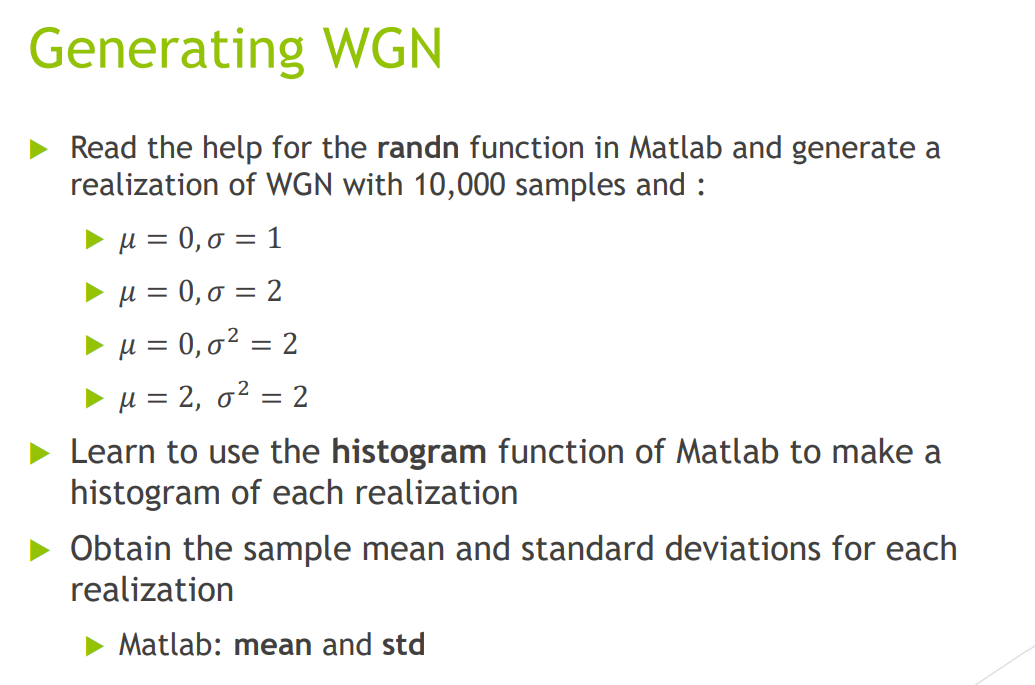

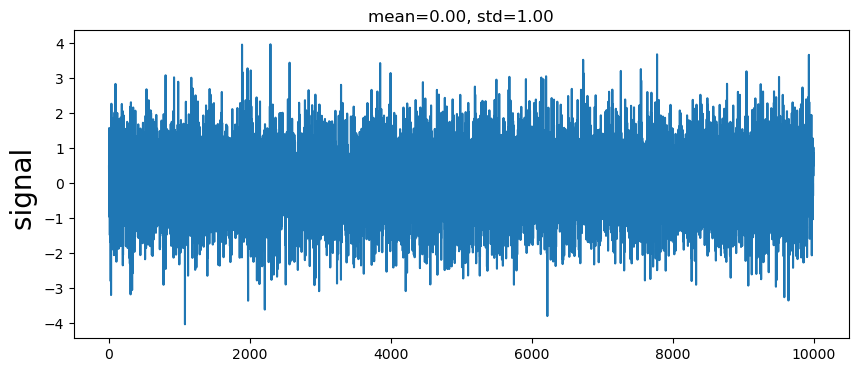

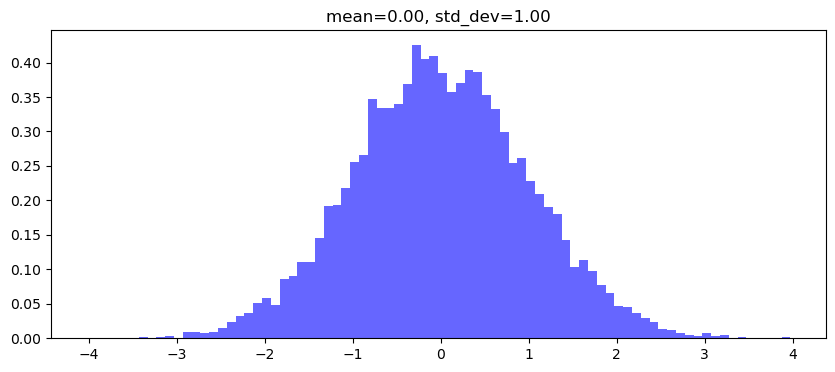

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成高斯分布样本
mean = 0  # 均值
std_dev = 1  # 标准差
sample_size = 10000  # 样本大小

# 生成样本
samples = np.random.normal(mean, std_dev, sample_size)

# 计算样本均值，方差，标准差
sample_mean = np.mean(samples)
sample_variance = np.var(samples)
sample_standard = np.std(samples)
sample_mean, sample_standard


plt.figure(figsize=(10,4))
plt.plot(samples)
#plt.xlabel('time (s)',fontsize=20)
plt.ylabel('signal ',fontsize=20)
plt.title('mean=%.2f, std=%.2f'%(mean, std_dev))
plt.show()

plt.figure(figsize=(10,4))
# 绘制直方图
plt.hist(samples, bins=80, density=True, alpha=0.6, color='b')
plt.title('mean=%.2f, std_dev=%.2f'%(np.mean(samples), np.std(samples)))

# 显示图像
plt.show()

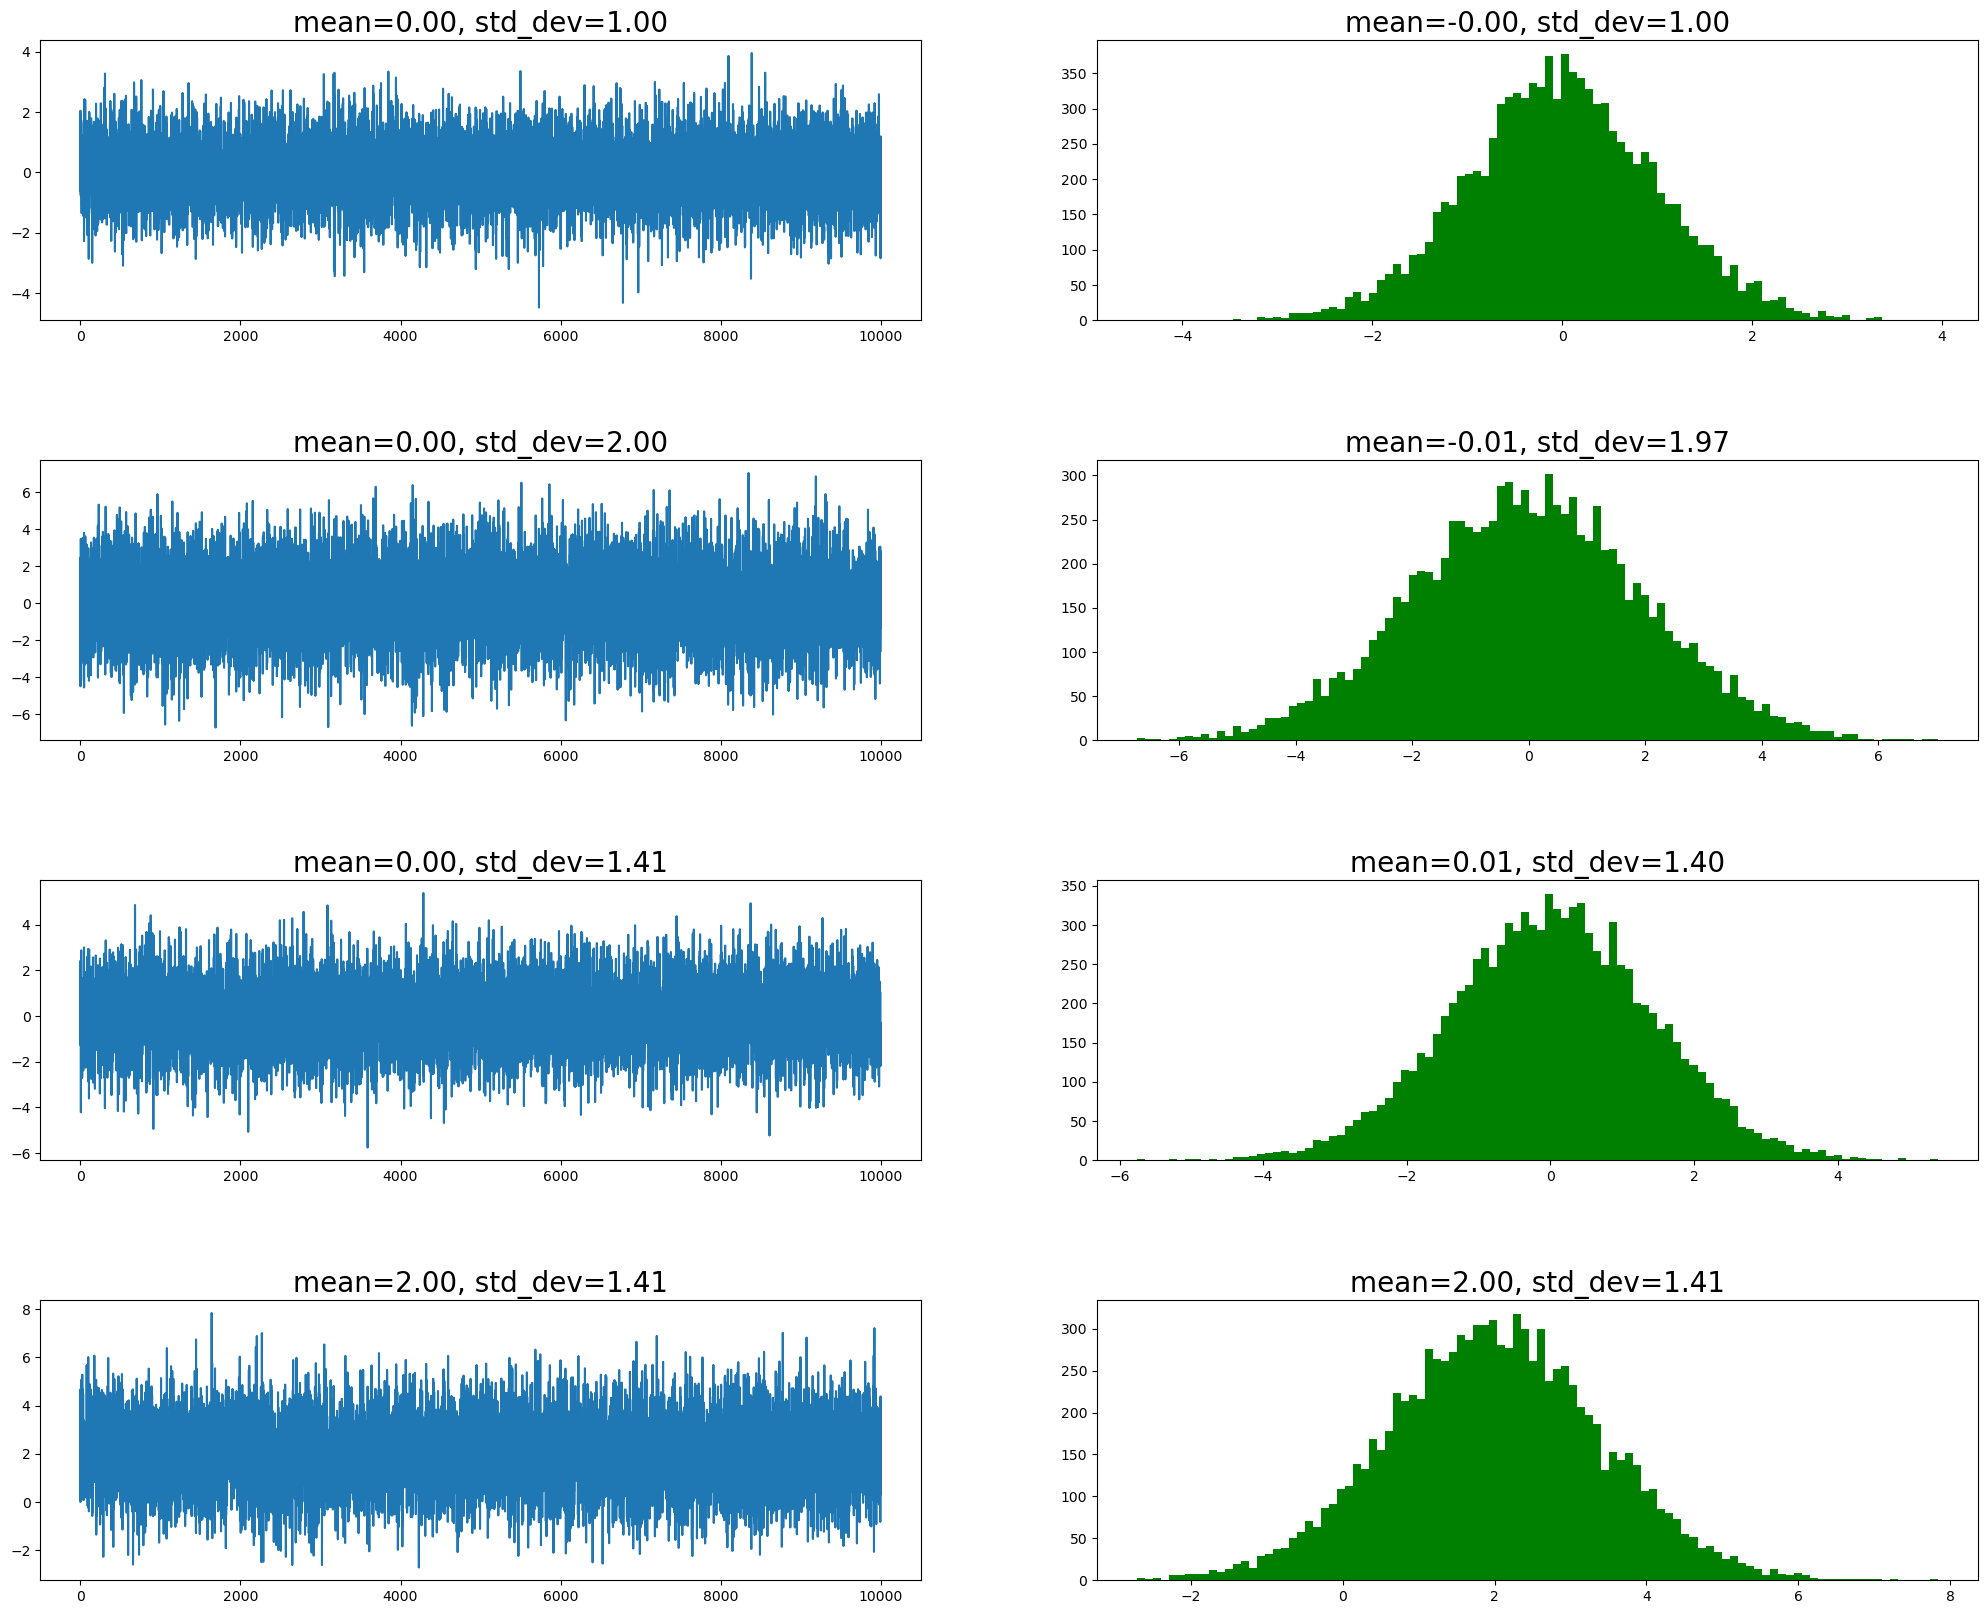

In [2]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
fig.subplots_adjust(hspace=0.5)
Nsample = 10000

for (mean, std_dev), ax_line in zip([(0, 1), (0, 2), (0, np.sqrt(2)), (2, np.sqrt(2))], ax):
    samples = np.random.normal(mean,std_dev, Nsample)
    ax_sig, ax_hist = ax_line
    ax_sig.plot(samples)
    ax_hist.hist(samples, bins=100, color='g')
    ax_sig.set_title('mean=%.2f, std_dev=%.2f'%(mean,std_dev),fontsize=20)
    ax_hist.set_title('mean=%.2f, std_dev=%.2f'%(np.mean(samples), np.std(samples )),fontsize=20)



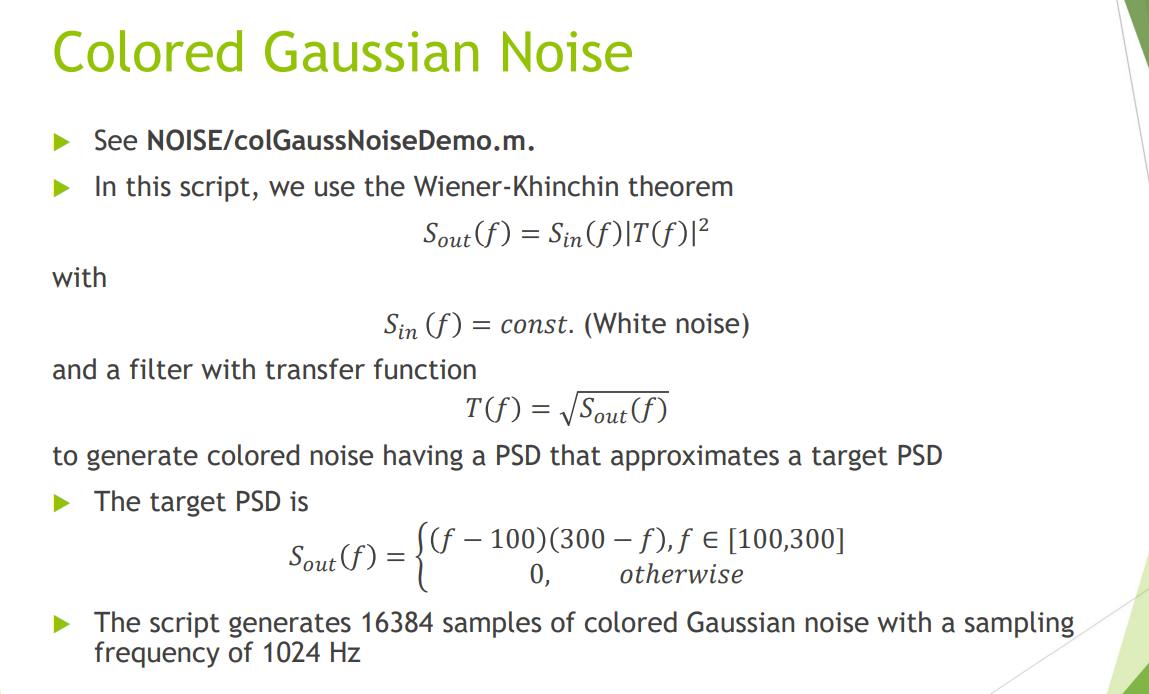

/home/sp/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


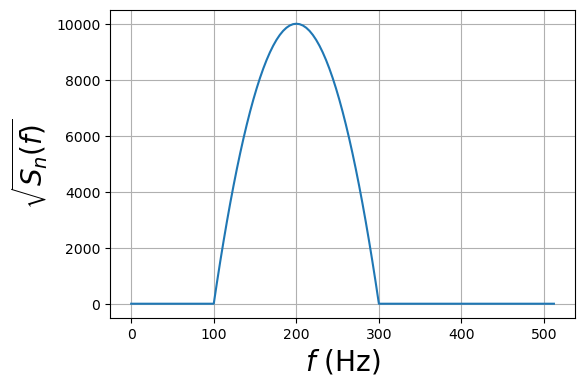

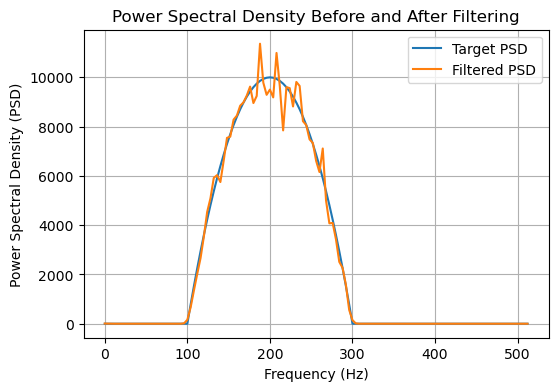

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

#生成随机噪声
# 生成高斯分布样本
mean = 0  # 均值
std_dev = 1  # 标准差
sample_size = 10000  # 样本大小

# 生成样本
noise = np.random.normal(mean, std_dev, sample_size)

# 使用Welch方法计算噪声的PSD
fs = 1024 # 采样频率
nperseg = 256 # 每段的长度
f_noise, Psd_noise = signal.welch(noise, fs=fs, nperseg=nperseg)


# 目标 PSD 函数
psd_freq = np.linspace(0, fs/2, 5121)
def target_PSD(f):
    return np.where((f >= 100) & (f <= 300), (f - 100) * (300 - f), 0)
psd_target = target_PSD(f_noise)


plt.figure(figsize=(6,4))
plt.plot(f_noise, psd_target)
plt.xlabel(r'$f\  (\rm Hz) $',fontsize=20)
plt.ylabel(r'$\sqrt{S_n(f)}$',fontsize=20)
plt.grid(True)
plt.show()

# 计算传递函数
transfer_func = np.sqrt(psd_target / Psd_noise)

# 使用firwin2设计FIR滤波器
numtaps = 201  # 滤波器系数的数量
normalized_f_noise = f_noise / (fs / 2)  # 归一化频率
fir_coefficients = signal.firwin2(numtaps, normalized_f_noise, transfer_func)

# 定义应用滤波器的函数
def apply_filter(data, fir_coefficients):
    filtered_data = signal.lfilter(fir_coefficients, 1.0, data)
    return filtered_data

# 对噪声进行滤波
filtered_noise = apply_filter(noise, fir_coefficients)

# 使用Welch方法估计滤波后信号的PSD
f_filtered, PSD_filtered = signal.welch(filtered_noise, fs=fs, nperseg=nperseg)

# 绘制原始和滤波后信号的PSD
plt.figure(figsize=(6,4))
plt.plot(f_noise, psd_target, label='Target PSD')
plt.plot(f_filtered, PSD_filtered, label='Filtered PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.legend()
plt.title('Power Spectral Density Before and After Filtering')
plt.grid(True)
plt.show()

# Simulating LIGO noise

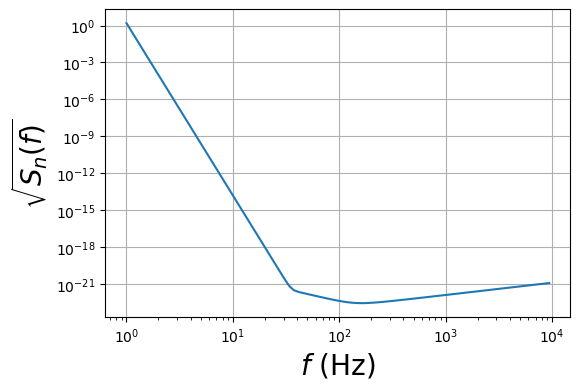

In [4]:
ligo_sensitivity = np.loadtxt('iLIGOSensitivity.txt')
ligo_asd_f, ligo_asd = ligo_sensitivity[:, 0], ligo_sensitivity[:, 1]
plt.figure(figsize=(6,4))
plt.loglog(ligo_asd_f, ligo_asd)
plt.xlabel(r'$f\  (\rm Hz) $',fontsize=20)
plt.ylabel(r'$\sqrt{S_n(f)}$',fontsize=20)
plt.grid(True)
plt.show()

# modifications
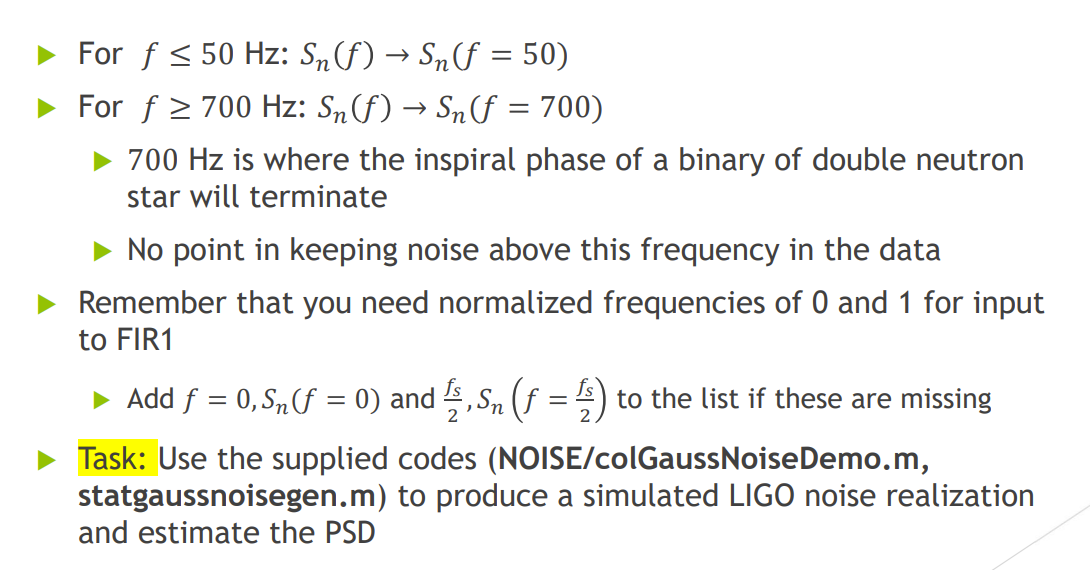

In [5]:
from scipy import interpolate

#插值，找出f=50和700的sqrt(Sn(f))
asd_interpolator = interpolate.interp1d(ligo_asd_f, ligo_asd, kind='cubic')
f_new = np.linspace(1, int(ligo_asd_f[-1]),int(ligo_asd_f[-1]))
ligo_asd_interpolator=asd_interpolator(f_new)

f_50=np.where(f_new == 50)
index_of_f50 = f_50[0][0]
value_at_f50 = ligo_asd_interpolator[index_of_f50]
#index_of_f50,f_new[index_of_f50],value_at_f50

f_700=np.where(f_new == 700)
index_of_f700 = f_700[0][0]
value_at_f700 = ligo_asd_interpolator[index_of_f700]
index_of_f700,f_new[index_of_f700],value_at_f700

(699, 700.0, 8.864949576935359e-23)

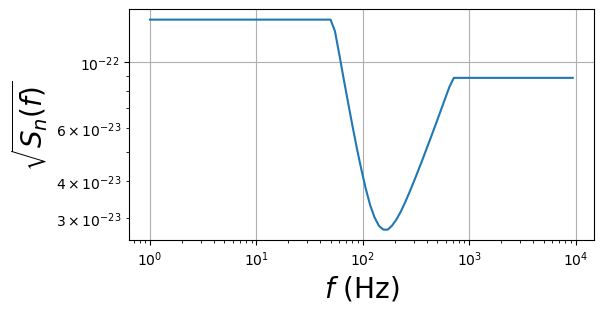

In [6]:
ligo_sensitivity1=ligo_sensitivity

ligo_sensitivity1[ligo_sensitivity1[:, 0] <= 50, 1] = value_at_f50  
ligo_sensitivity1[ligo_sensitivity1[:, 0] >= 700, 1] = value_at_f700 


ligo_asd_f1, ligo_asd1 = ligo_sensitivity1[:, 0], ligo_sensitivity1[:, 1]
plt.figure(figsize=(6,3))
plt.loglog(ligo_asd_f1, ligo_asd1)
plt.xlabel(r'$f\  (\rm Hz) $',fontsize=20)
plt.ylabel(r'$\sqrt{S_n(f)}$',fontsize=20)
plt.grid(True)
plt.show()
#目标PSD函数
psd_interpolator = interpolate.interp1d(ligo_asd_f1, ligo_asd1**2, kind='cubic',fill_value="extrapolate")


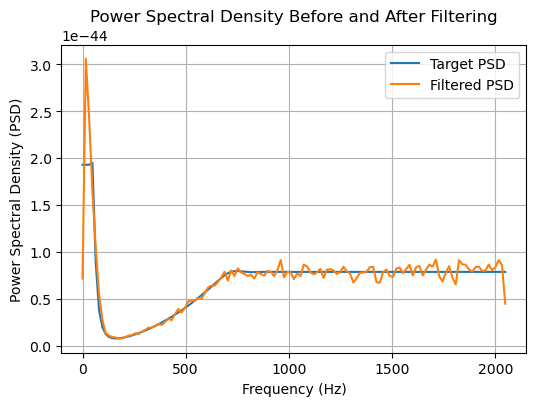

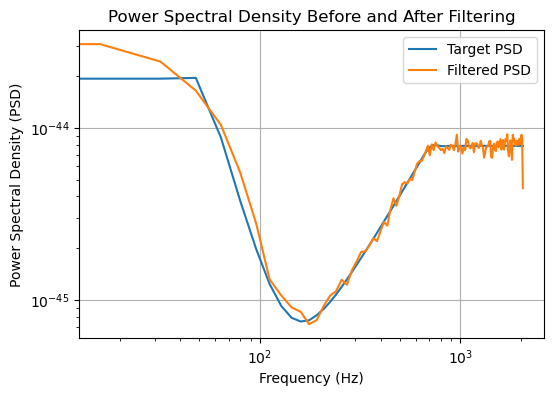

In [7]:
#生成随机噪声
noise = np.random.randn(10000)

# 使用Welch方法计算噪声的PSD
fs = 1024*4 # 采样频率
nperseg = 256 # 每段的长度
f, PSD = signal.welch(noise, fs=fs, nperseg=nperseg)


# 创建 target PSD
targetPSD =  psd_interpolator(f)

# 计算传递函数
transfer_func = np.sqrt(targetPSD / PSD)

# 使用firwin2设计FIR滤波器
numtaps = 201 # # 滤波器系数的数量
fir_coefficients = signal.firwin2(numtaps, f / (fs / 2), transfer_func)

# 定义应用滤波器的函数
def apply_filter(data, fir_coefficients):
    filtered_data = signal.lfilter(fir_coefficients, 1.0, data)
    return filtered_data

# 对噪声进行滤波
filtered_noise = apply_filter(noise, fir_coefficients)

# 使用Welch方法估计滤波后信号的PSD
f_filtered, PSD_filtered = signal.welch(filtered_noise, fs=fs, nperseg=nperseg)

# Plot the original and filtered PSDs
plt.figure(figsize=(6,4))
#plt.semilogy(f, PSD, label='Original PSD')
plt.plot(f, targetPSD, label='Target PSD')
plt.plot(f_filtered, PSD_filtered, label='Filtered PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.legend()
plt.title('Power Spectral Density Before and After Filtering')
plt.grid(True)
plt.show()


# loglog图
plt.figure(figsize=(6,4))
plt.loglog(f, targetPSD, label='Target PSD')
plt.loglog(f_filtered, PSD_filtered, label='Filtered PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.legend()
plt.title('Power Spectral Density Before and After Filtering')
plt.grid(True)
plt.show()